<a href="https://colab.research.google.com/github/Jermish-Justin/EDA-DA/blob/main/21BDS0062_EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING DATASET**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4360 non-null   int64  
 1   nr          4360 non-null   int64  
 2   year        4360 non-null   int64  
 3   school      4360 non-null   int64  
 4   exper       4360 non-null   int64  
 5   union       4360 non-null   object 
 6   ethn        4360 non-null   object 
 7   maried      4360 non-null   object 
 8   health      4360 non-null   object 
 9   wage        4360 non-null   float64
 10  industry    4360 non-null   object 
 11  occupation  4360 non-null   object 
 12  residence   3115 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 442.9+ KB


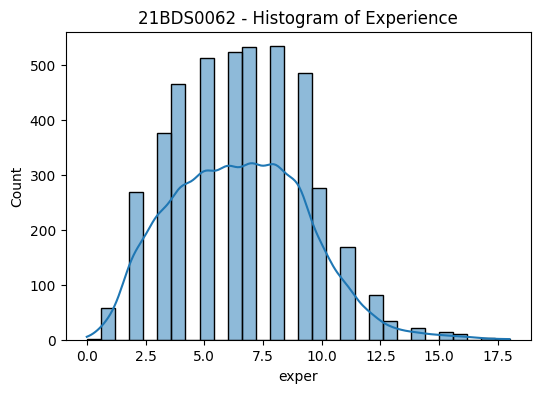

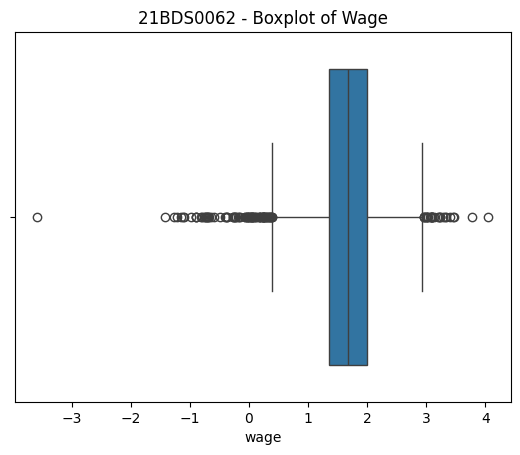

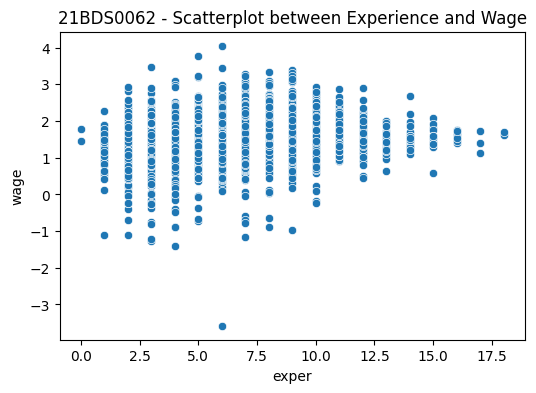

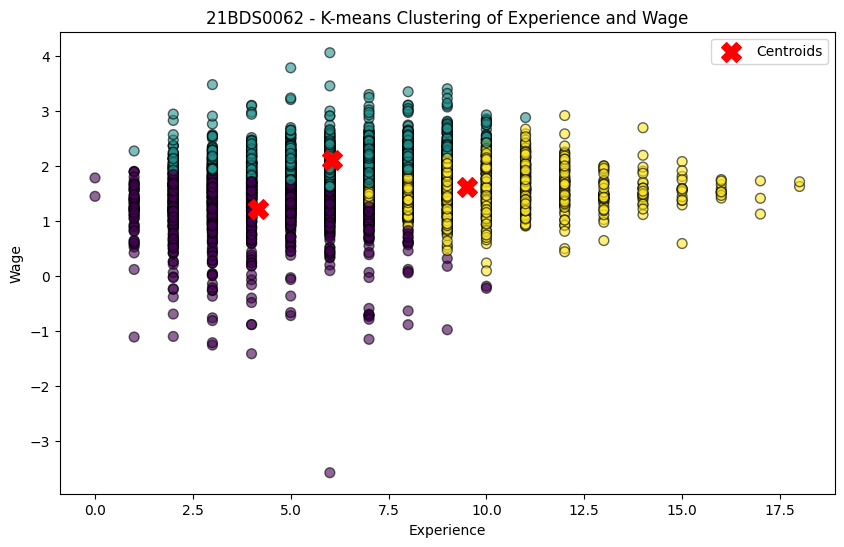

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Load the new dataset
BDS0062 = pd.read_csv('Males.csv')
BDS0062.head()

# Basic information about the dataset
BDS0062.info()

# Descriptive statistics
BDS0062.describe()

# Univariate Analysis: Histogram
plt.figure(figsize=(6,4))
sns.histplot(BDS0062['exper'], kde=True)
plt.title('21BDS0062 - Histogram of Experience')
plt.show()

# Box-plot Example
sns.boxplot(x=BDS0062['wage'])
plt.title('21BDS0062 - Boxplot of Wage')
plt.show()

# Bivariate Analysis: Scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x='exper', y='wage', data=BDS0062)
plt.title('21BDS0062 - Scatterplot between Experience and Wage')
plt.show()

# Clustering Analysis with K-means (as an example)
scaler = StandardScaler()
K_means_data = BDS0062[['exper', 'wage']]
X_scaled = scaler.fit_transform(K_means_data)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
BDS0062['Cluster'] = clusters

# Display Clusters
plt.figure(figsize=(10, 6))
plt.scatter(BDS0062['exper'], BDS0062['wage'], c=BDS0062['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6, edgecolor='k')
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            color='red', marker='X', s=200, label='Centroids')
plt.xlabel('Experience')
plt.ylabel('Wage')
plt.title('21BDS0062 - K-means Clustering of Experience and Wage')
plt.legend()
plt.show()


In [ ]:

import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Males.csv']))
df.head()

Saving Males.csv to Males.csv


,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
1,2,13,1981,14,2,yes,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
2,3,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
3,4,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
4,5,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east


**Exploring Dimensions and Summary of the Data**

In [ ]:
print(f"Dataset Dimensions: {df.shape}")
print("\nSummary Statistics:")
df.describe(include='all')

Dataset Dimensions: (4360, 13)

Summary Statistics:


,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360,4360,4360,4360,4360.000000,4360,4360,3115
unique,NaN,NaN,NaN,NaN,NaN,2,3,2,2,NaN,12,9,4
top,NaN,NaN,NaN,NaN,NaN,no,other,no,no,NaN,Manufacturing,"Craftsmen, Foremen_and_kindred",south
freq,NaN,NaN,NaN,NaN,NaN,3296,3176,2446,4286,NaN,1231,934,1333
mean,2180.500000,5262.058716,1983.500000,11.766972,6.514679,NaN,NaN,NaN,NaN,1.649147,NaN,NaN,NaN
std,1258.767916,3496.149815,2.291551,1.746181,2.825873,NaN,NaN,NaN,NaN,0.532609,NaN,NaN,NaN
min,1.000000,13.000000,1980.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,-3.579079,NaN,NaN,NaN
25%,1090.750000,2329.000000,1981.750000,11.000000,4.000000,NaN,NaN,NaN,NaN,1.350717,NaN,NaN,NaN
50%,2180.500000,4569.000000,1983.500000,12.000000,6.000000,NaN,NaN,NaN,NaN,1.671143,NaN,NaN,NaN
75%,3270.250000,8406.000000,1985.250000,12.000000,9.000000,NaN,NaN,NaN,NaN,1.991086,NaN,NaN,NaN


**Data Handling (Checking for Missing Values)**

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)


Missing Values:
rownames         0
nr               0
year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64

Data Types:
rownames        int64
nr              int64
year            int64
school          int64
exper           int64
union          object
ethn           object
maried         object
health         object
wage          float64
industry       object
occupation     object
residence      object
dtype: object


**Data Cleaning (Handling Missing Values and Duplicates)**

In [ ]:
df.drop_duplicates(inplace=True)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
rownames      0
nr            0
year          0
school        0
exper         0
union         0
ethn          0
maried        0
health        0
wage          0
industry      0
occupation    0
residence     0
dtype: int64


# Multivariate Analysis

Pairplot to Visualize Relationships Between Multiple Variables**

Index(['rownames', 'nr', 'year', 'school', 'exper', 'union', 'ethn', 'maried',
       'health', 'wage', 'industry', 'occupation', 'residence'],
      dtype='object')


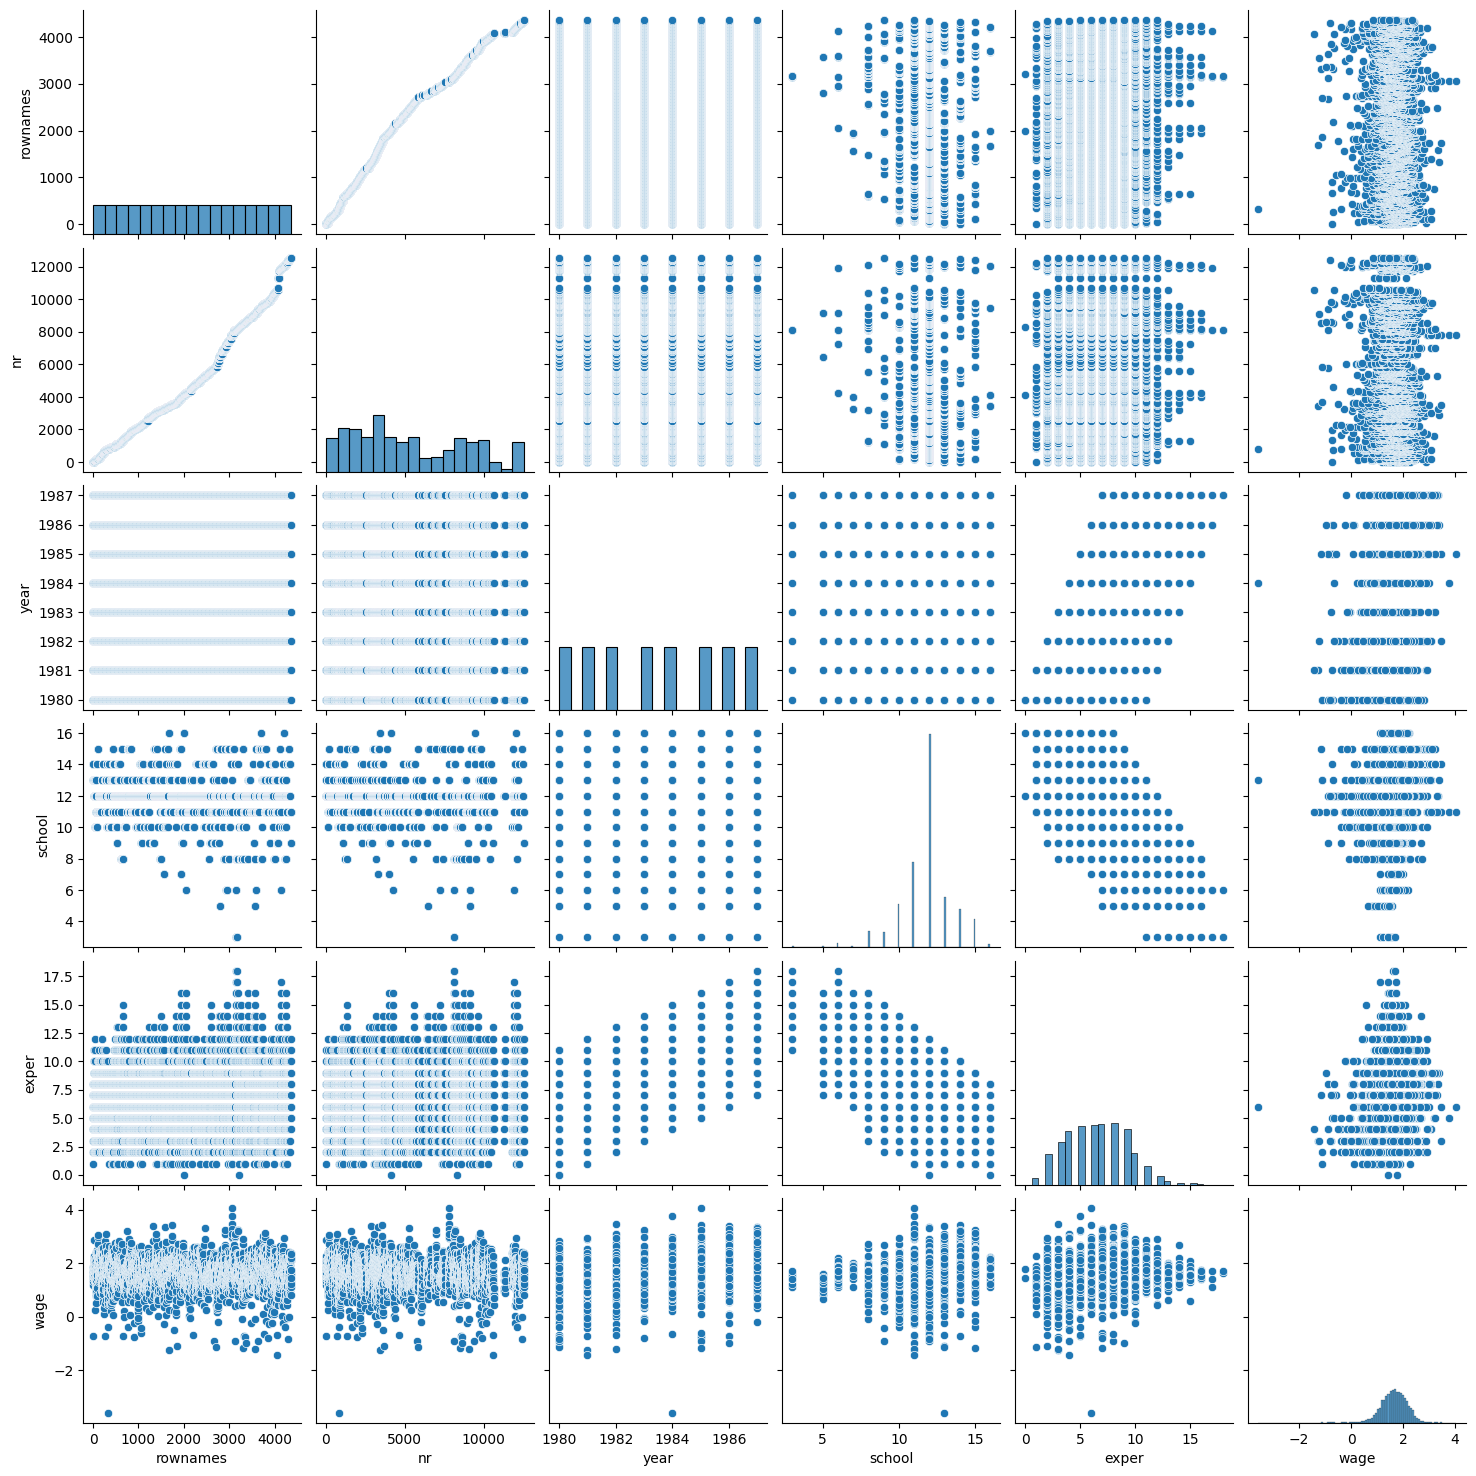

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Males.csv"
df = pd.read_csv(url)

df.head()


print(df.columns)


sns.pairplot(df)
plt.show()



In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(url['wage'], kde=True)
plt.title('21BDS0062 - Histogram of age')
plt.show()

NameError: name 'plt' is not defined